<a href="https://colab.research.google.com/github/hemashreergowda/DadGAN/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

In [ ]:
df_normal  = pd.read_csv("/content/drive/MyDrive/Normal_data (2).csv")
df_normal.head()
#df_normal.shape

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,05/02/2020 13:58,245230,44,40,124937,1071,9100,0,"2,839.4772730","1,839.5082570",517,0,26.7750000,109.1880259,"513,835.9907000",342.5355788,"2,954.5783130","7,953.2219270",64066,-44,238564,"5,548.0000000","10,446.2957600",64066,2,245230,"6,287.9487180","12,986.4687900",79070,29,0,0,0,0,...,0,9100,"1,482.4470590","1,933.2683130","3,737,526.3690000",0,1,0,0,1,0,0,0,0,"1,500.0952380","2,839.4772730",26.7750000,0,0,0,0,0,0,44,124937,40,1071,-1,65535,41,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,05/02/2020 13:58,1605449,107,149,1071,439537,517,0,10.0093458,67.4966799,27300,0,"2,949.9127520","3,012.5895390","274,445.3421000",159.4569494,"6,295.8784310","56,408.3305200",859760,-102,1332121,"12,567.1792500","83,434.1415500",861138,2,1603130,"10,831.9594600","73,926.6524500",861129,1,0,0,0,0,...,0,27300,"1,714.4280160","2,713.4659170","7,362,897.2850000",0,1,0,0,0,0,0,0,1,"1,721.1250000",10.0093458,"2,949.9127520",0,0,0,0,0,0,107,1071,149,439537,-1,64240,4,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,05/02/2020 13:58,53078,5,5,66,758,66,0,13.2000000,29.5160973,638,0,151.6000000,276.8262993,"15,524.3226900",188.4019745,"5,897.5555560","15,184.8452000",46232,19,50302,"12,575.5000000","22,521.8772700",46251,67,52962,"13,240.5000000","22,052.0440500",46258,405,0,0,0,0,...,0,638,74.9090909,190.8074708,"36,407.4909100",0,1,0,0,0,0,0,0,1,82.4000000,13.2000000,151.6000000,0,0,0,0,0,0,5,66,5,758,-1,64240,1,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,05/02/2020 13:58,6975,1,1,0,0,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,286.7383513,"6,975.0000000",0.0000000,6975,6975,0,0.0000000,0.0000000,0,0,0,0.0000000,0.0000000,0,0,0,0,0,0,...,0,0,0.0000000,0.0000000,0.0000000,0,0,0,0,1,0,0,0,1,0.0000000,0.0000000,0.0000000,0,0,0,0,0,0,1,0,1,0,-1,64239,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,05/02/2020 13:58,190141,13,16,780,11085,427,0,60.0000000,130.0429416,2596,0,692.8125000,794.1573495,"62,401.0602700",152.5183942,"6,790.7500000","12,933.2959100",38521,-54,86882,"7,240.1666670","13,050.8416300",38805,1,190141,"12,676.0666700","15,949.0927900",38521,1,0,0,0,0,...,0,2596,395.5000000,661.6917060,"437,835.9138000",0,1,0,0,0,0,0,0,1,409.1379310,60.0000000,692.8125000,0,0,0,0,0,0,13,780,16,11085,-1,64240,3,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0


In [ ]:
df1  = pd.read_csv("/content/drive/MyDrive/OVS-ddos (1).csv")
df1.head()
#df1.shape

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.20.134-122.37.162.153-0-0-0,122.37.162.153,0,192.168.20.134,0,0,04/02/2020 15:20,1,0,2,0,0,0,0,0,0,0,0,0,0,0,"2,000,000.0000000",1.0000000,0.0000000,1,1,0,0.0000000,0.0000000,0,0,1,1.0000000,0.0000000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,-1,-1,0,0,0.0000000,0.0000000,0,0,0,0.0000000,0,0,1
1,192.168.20.134-201.199.251.61-0-0-0,201.199.251.61,0,192.168.20.134,0,0,04/02/2020 15:20,1,0,2,0,0,0,0,0,0,0,0,0,0,0,"2,000,000.0000000",1.0000000,0.0000000,1,1,0,0.0000000,0.0000000,0,0,1,1.0000000,0.0000000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,-1,-1,0,0,0.0000000,0.0000000,0,0,0,0.0000000,0,0,1
2,187.149.196.242-192.168.20.134-0-0-0,187.149.196.242,0,192.168.20.134,0,0,04/02/2020 15:20,1,0,2,0,0,0,0,0,0,0,0,0,0,0,"2,000,000.0000000",1.0000000,0.0000000,1,1,0,0.0000000,0.0000000,0,0,1,1.0000000,0.0000000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,-1,-1,0,0,0.0000000,0.0000000,0,0,0,0.0000000,0,0,1
3,192.168.20.134-62.74.175.18-0-0-0,62.74.175.18,0,192.168.20.134,0,0,04/02/2020 15:20,2,0,2,0,0,0,0,0,0,0,0,0,0,0,"1,000,000.0000000",2.0000000,0.0000000,2,2,0,0.0000000,0.0000000,0,0,2,2.0000000,0.0000000,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,-1,-1,0,0,0.0000000,0.0000000,0,0,0,0.0000000,0,0,1
4,192.168.20.134-82.62.99.149-0-0-0,82.62.99.149,0,192.168.20.134,0,0,04/02/2020 15:20,1,0,2,0,0,0,0,0,0,0,0,0,0,0,"2,000,000.0000000",1.0000000,0.0000000,1,1,0,0.0000000,0.0000000,0,0,1,1.0000000,0.0000000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,-1,-1,0,0,0.0000000,0.0000000,0,0,0,0.0000000,0,0,1


In [ ]:
df1 = df1.iloc[1:100,:]
df1.shape

(99, 84)

In [ ]:
frames = [df_normal, df1]

In [ ]:
result = pd.concat(frames)
result.shape

(68523, 84)

In [ ]:
#result.to_csv('/content/drive/MyDrive/PhD/1-Anomaly-Detection/SDN-DataSet/final-sdn-ddos-data.csv',index=False)

In [ ]:
features = ['Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',	'Fwd Pkt Len Min',	'Fwd Pkt Len Mean',	'Fwd Pkt Len Std',	'Bwd Pkt Len Max',	'Bwd Pkt Len Min',	'Bwd Pkt Len Mean',	'Bwd Pkt Len Std','Flow Byts/s',	'Flow Pkts/s','Flow IAT Mean',	'Flow IAT Std',	'Flow IAT Max',	'Flow IAT Min',	'Fwd IAT Tot',	'Fwd IAT Mean',	'Fwd IAT Std',	'Fwd IAT Max',	'Fwd IAT Min','Bwd IAT Tot',	'Bwd IAT Mean',	'Bwd IAT Std',	'Bwd IAT Max',	'Bwd IAT Min','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','Pkt Size Avg','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','Label']

features = result[features]

In [ ]:
features.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,245230,44,40,124937,1071,9100,0,"2,839.4772730","1,839.5082570",517,0,26.7750000,109.1880259,"513,835.9907000",342.5355788,"2,954.5783130","7,953.2219270",64066,-44,238564,"5,548.0000000","10,446.2957600",64066,2,245230,"6,287.9487180","12,986.4687900",79070,29,880,804,179.4233984,163.1121804,0,9100,"1,482.4470590","1,933.2683130","3,737,526.3690000","1,500.0952380",0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
1,6,1605449,107,149,1071,439537,517,0,10.0093458,67.4966799,27300,0,"2,949.9127520","3,012.5895390","274,445.3421000",159.4569494,"6,295.8784310","56,408.3305200",859760,-102,1332121,"12,567.1792500","83,434.1415500",861138,2,1603130,"10,831.9594600","73,926.6524500",861129,1,2140,3004,66.6480218,92.8089276,0,27300,"1,714.4280160","2,713.4659170","7,362,897.2850000","1,721.1250000",0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
2,6,53078,5,5,66,758,66,0,13.2000000,29.5160973,638,0,151.6000000,276.8262993,"15,524.3226900",188.4019745,"5,897.5555560","15,184.8452000",46232,19,50302,"12,575.5000000","22,521.8772700",46251,67,52962,"13,240.5000000","22,052.0440500",46258,405,100,124,94.2009872,94.2009872,0,638,74.9090909,190.8074708,"36,407.4909100",82.4000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
3,6,6975,1,1,0,0,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,286.7383513,"6,975.0000000",0.0000000,6975,6975,0,0.0000000,0.0000000,0,0,0,0.0000000,0.0000000,0,0,20,20,143.3691756,143.3691756,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
4,6,190141,13,16,780,11085,427,0,60.0000000,130.0429416,2596,0,692.8125000,794.1573495,"62,401.0602700",152.5183942,"6,790.7500000","12,933.2959100",38521,-54,86882,"7,240.1666670","13,050.8416300",38805,1,190141,"12,676.0666700","15,949.0927900",38521,1,260,344,68.3703147,84.1480796,0,2596,395.5000000,661.6917060,"437,835.9138000",409.1379310,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0


In [ ]:
features.to_csv('/content/drive/MyDrive/final_dataset',index=False)

In [ ]:
features.shape

(68523, 49)

In [ ]:
features = features.sample(frac = 1)#SHUFFLE THE DATASET AND CONSIDERING ENTIRE DATASET BECAUSE frac=1
features.head()


,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
47502,6,5465173,11,14,2698,4850,613,0,245.2727273,291.5157254,2600,0,346.4285714,688.7423002,"1,381.1090700",4.5744206,"227,715.5417000","1,017,327.2210000",5001968,11,441231,"44,123.1000000","42,703.2461700",120096,85,5465173,"420,397.9231000","1,377,021.6360000",5001995,97,220,304,2.0127451,2.5616755,0,2600,290.3076923,535.4345353,"286,690.1415000",301.9200000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
13398,17,3316,1,3,34,690,34,34,34.0000000,0.0000000,334,34,230.0000000,169.8469900,"218,335.3438000","1,206.2726180","1,105.3333330","1,393.3780300",2699,117,0,0.0000000,0.0000000,0,0,3316,"1,658.0000000","2,179.3031000",3199,117,8,24,301.5681544,904.7044632,34,334,151.6000000,161.0863123,"25,948.8000000",189.5000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
60323,17,5537,1,3,45,675,45,45,45.0000000,0.0000000,321,45,225.0000000,156.0000000,"130,034.3146000",722.4128589,"1,845.6666670","3,058.3404540",5376,3,0,0.0000000,0.0000000,0,0,5537,"2,768.5000000","3,911.0076070",5534,3,8,24,180.6032147,541.8096442,45,321,153.0000000,147.9459361,"21,888.0000000",191.2500000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
35498,0,35592953,1,1,0,0,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0561909,"35,600,000.0000000",0.0000000,35600000,35600000,0,0.0000000,0.0000000,0,0,0,0.0000000,0.0000000,0,0,0,0,0.0280954,0.0280954,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,"35,600,000.0000000",0.0000000,35600000,35600000,0
16775,6,4934238,3,6,46,169,46,0,15.3333333,26.5581124,46,0,28.1666667,22.5780129,43.5730907,1.8239898,"616,779.7500000","1,739,771.8470000",4922494,17,4926997,"2,463,498.5000000","3,477,544.7860000",4922494,4503,4934238,"986,847.6000000","2,201,443.0280000",4924908,549,60,120,0.6079966,1.2159932,0,46,26.1000000,22.9223326,525.4333333,29.0000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0


In [ ]:
features.to_csv('/content/drive/MyDrive/final_dataset',index=False)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
RANDOM_SEED = 2021 
TEST_PCT = 0.3
LABELS = ["0","1"]

In [ ]:
#check for any  nullvalues 
print("Any nulls in the dataset ",features.isnull().values.any() )
features.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print("Any nulls in the dataset ",features.isnull().values.any() )
print('-------')
print("No. of unique labels ", len(features['Label'].unique()))
print("Label values ",features.Label.unique())
#0 is for normal credit card transaction
#1 is for fraudulent credit card transaction
print('-------')
print("Break down of the Normal and Fraud Transactions")
print(pd.value_counts(features['Label'], sort = True) )

Any nulls in the dataset  False
Any nulls in the dataset  False
-------
No. of unique labels  2
Label values  [0 1]
-------
Break down of the Normal and Fraud Transactions
0    68424
1       99
Name: Label, dtype: int64


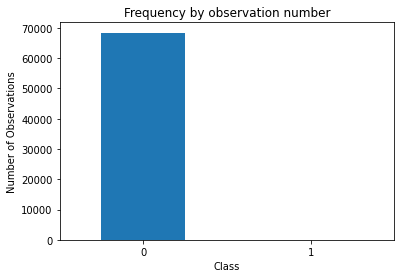

In [ ]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(features['Label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(features['Label'].unique())), features.Label.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [ ]:

dataset=features
dataset.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
47502,6,5465173,11,14,2698,4850,613,0,245.2727273,291.5157254,2600,0,346.4285714,688.7423002,"1,381.1090700",4.5744206,"227,715.5417000","1,017,327.2210000",5001968,11,441231,"44,123.1000000","42,703.2461700",120096,85,5465173,"420,397.9231000","1,377,021.6360000",5001995,97,220,304,2.0127451,2.5616755,0,2600,290.3076923,535.4345353,"286,690.1415000",301.9200000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
13398,17,3316,1,3,34,690,34,34,34.0000000,0.0000000,334,34,230.0000000,169.8469900,"218,335.3438000","1,206.2726180","1,105.3333330","1,393.3780300",2699,117,0,0.0000000,0.0000000,0,0,3316,"1,658.0000000","2,179.3031000",3199,117,8,24,301.5681544,904.7044632,34,334,151.6000000,161.0863123,"25,948.8000000",189.5000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
60323,17,5537,1,3,45,675,45,45,45.0000000,0.0000000,321,45,225.0000000,156.0000000,"130,034.3146000",722.4128589,"1,845.6666670","3,058.3404540",5376,3,0,0.0000000,0.0000000,0,0,5537,"2,768.5000000","3,911.0076070",5534,3,8,24,180.6032147,541.8096442,45,321,153.0000000,147.9459361,"21,888.0000000",191.2500000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0
35498,0,35592953,1,1,0,0,0,0,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.0561909,"35,600,000.0000000",0.0000000,35600000,35600000,0,0.0000000,0.0000000,0,0,0,0.0000000,0.0000000,0,0,0,0,0.0280954,0.0280954,0,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,"35,600,000.0000000",0.0000000,35600000,35600000,0
16775,6,4934238,3,6,46,169,46,0,15.3333333,26.5581124,46,0,28.1666667,22.5780129,43.5730907,1.8239898,"616,779.7500000","1,739,771.8470000",4922494,17,4926997,"2,463,498.5000000","3,477,544.7860000",4922494,4503,4934238,"986,847.6000000","2,201,443.0280000",4924908,549,60,120,0.6079966,1.2159932,0,46,26.1000000,22.9223326,525.4333333,29.0000000,0.0000000,0.0000000,0,0,0.0000000,0.0000000,0,0,0


In [ ]:
raw_data = dataset.values
# The last element contains if the transaction is normal which is represented by a 0 and if fraud then 1
labels = raw_data[:, -1]
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2021)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(54818, 48)
(13705, 48)
(54818,)
(13705,)


In [ ]:
# Normalize the above splits using the MinMaxScaler from the scikit learn package
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Make sure to only fit the scaler on the training data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Creating dataset dictionary 
dataset = {}
dataset['x_train'] = x_train.astype(np.float32)
dataset['y_train'] = y_train.astype(np.float32)
dataset['x_test']  = x_test.astype(np.float32)
dataset['y_test']  = y_test.astype(np.float32)

In [ ]:
# check how many anomalies are in our Testing set
import collections
print('Number of Normal Network packets in the Training set:', x_train.shape[0])
print('Number of Normal Network packets in the Testing set:', collections.Counter(y_test)[0])
print('Number of Anomalous Network packets in the Testing set:', collections.Counter(y_test)[1])

Number of Normal Network packets in the Training set: 54818
Number of Normal Network packets in the Testing set: 13680
Number of Anomalous Network packets in the Testing set: 25


In [ ]:
# Defining the Generator network

def get_generator(optimizer):
    
    generator = Sequential()
    generator.add(Dense(64, input_dim=48, kernel_initializer=initializers.glorot_normal(seed=42)))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(128))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
       
    generator.add(Dense(512))
    generator.add(Activation('tanh'))
   
    generator.add(Dense(48, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return generator

In [ ]:
##### Defining the Discriminator network

def get_discriminator(optimizer):
    
    discriminator = Sequential()
    
    discriminator.add(Dense(256, input_dim=48, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Activation('tanh'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('tanh'))
    discriminator.add(Dropout(0.2))
       
    discriminator.add(Dense(128))
    discriminator.add(Activation('tanh'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('tanh'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('tanh'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))
   
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return discriminator

Building the Network

In [ ]:
def get_gan_network(discriminator, generator, optimizer,input_dim=48):

    discriminator.trainable = False   
    gan_input = Input(shape=(input_dim,))  
    x = generator(gan_input)        
    gan_output = discriminator(x)
    
    gan = Model(inputs=gan_input, outputs=gan_output)    
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return gan

In [ ]:
from keras import initializers
from keras.models import Model, Sequential
#from keras.optimizers import 
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input, BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation 
from keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate
import pickle

In [ ]:
learning_rate = 0.00001
batch_size = 512
epochs = 10
adam = Adam(lr = learning_rate,beta_1 = 0.5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#Training the GAN
from tqdm import tqdm
x_train, y_train, x_test, y_test = dataset['x_train'], dataset['y_train'],dataset['x_test'],dataset['y_test']

#Calculating the number of batches based on the batch size
batch_count = x_train.shape[0] // batch_size
pbar = tqdm(total=epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam, input_dim=48)


for epoch in range(epochs):        
    for index in range(batch_count):        
        pbar.update(1)        
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,48])
        
        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)
        
        #Obtain a batch of normal network packets
        image_batch = x_train[index * batch_size: (index + 1) * batch_size]
            
        X = np.vstack((generated_images,image_batch))       
        y_dis = np.ones(2*batch_size) 
        y_dis[:batch_size] = 0

        # Train discriminator
        discriminator.trainable = True
        d_loss= discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, 48]) 
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)
        
        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)
        
    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))
              

 10%|█         | 110/1070 [00:09<01:16, 12.49it/s]

Epoch 0 Batch 106/107 [D loss: 0.588493] [G loss:0.229881]


 20%|██        | 216/1070 [00:17<01:06, 12.76it/s]

Epoch 1 Batch 106/107 [D loss: 0.545927] [G loss:0.233348]


 30%|███       | 324/1070 [00:26<00:56, 13.18it/s]

Epoch 2 Batch 106/107 [D loss: 0.548476] [G loss:0.198137]


 40%|████      | 430/1070 [00:34<00:48, 13.26it/s]

Epoch 3 Batch 106/107 [D loss: 0.538924] [G loss:0.205806]


 50%|█████     | 538/1070 [00:42<00:40, 13.19it/s]

Epoch 4 Batch 106/107 [D loss: 0.548684] [G loss:0.164455]


 60%|██████    | 644/1070 [00:50<00:32, 13.13it/s]

Epoch 5 Batch 106/107 [D loss: 0.528758] [G loss:0.186828]


 70%|███████   | 752/1070 [00:58<00:24, 13.04it/s]

Epoch 6 Batch 106/107 [D loss: 0.575880] [G loss:0.204935]


 80%|████████  | 858/1070 [01:07<00:16, 12.91it/s]

Epoch 7 Batch 106/107 [D loss: 0.551235] [G loss:0.208619]


 90%|█████████ | 966/1070 [01:15<00:08, 12.95it/s]

Epoch 8 Batch 106/107 [D loss: 0.538630] [G loss:0.217961]


100%|██████████| 1070/1070 [01:23<00:00, 13.32it/s]

Epoch 9 Batch 106/107 [D loss: 0.541927] [G loss:0.225762]


Let's visualize the generator and discriminator training losses!

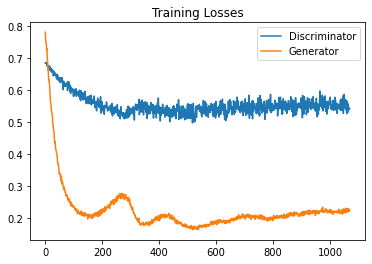

In [ ]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()

In [ ]:
# Predictions on the test set

nr_batches_test = np.ceil(x_test.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):    
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = x_test[ran_from:ran_to]             
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=128,verbose=0)        
        results = np.append(results, tmp_rslt)   

In [ ]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(y_test)], axis=1)
results_df.columns = ['results','y_test']
print ('Mean score for normal packets :', results_df.loc[results_df['y_test'] == 0, 'results'].mean() )
print ('Mean score for anomalous packets :', results_df.loc[results_df['y_test'] == 1, 'results'].mean())

Mean score for normal packets : 0.6513554712572293
Mean score for anomalous packets : 0.28946051359176633


In [ ]:
#Obtaining the lowest 1% score
per = np.percentile(results,1)
y_pred = results.copy()
y_pred = np.array(y_pred)

#Thresholding based on the score
inds = (y_pred > per)
inds_comp = (y_pred <= per)
y_pred[inds] = 0
y_pred[inds_comp] = 1


Evaluation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,precision_recall_fscore_support, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix,accuracy_score

In [ ]:
precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(y_test, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.9900766143743159
Precision : 0.15527950310559005
Recall : 1.0
F1 : 0.26881720430107525


Confusion Matrix :


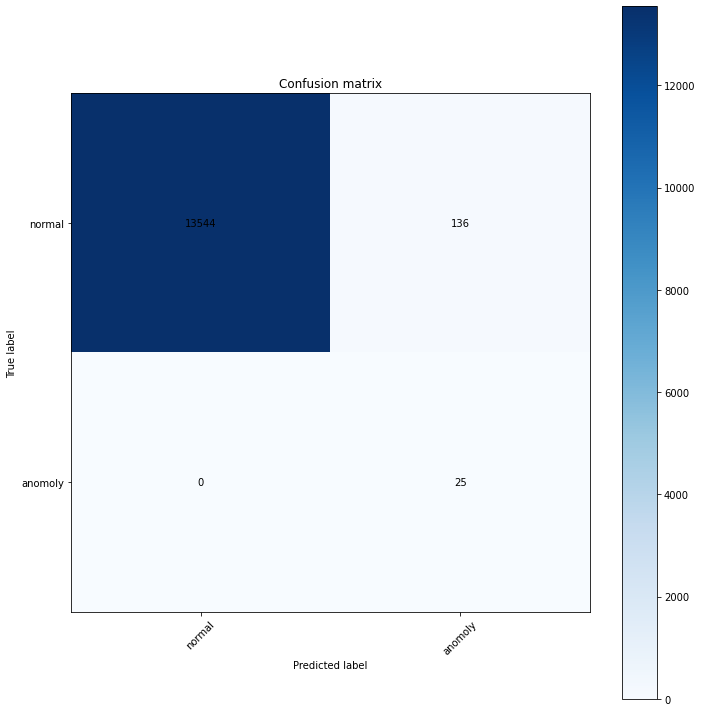

In [ ]:
cm = confusion_matrix(y_test, y_pred)
target_names = ['normal', 'anomoly']

print ('Confusion Matrix :')

def plot_confusion_matrix(cm,target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10),)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm,target_names)

##Run the function##

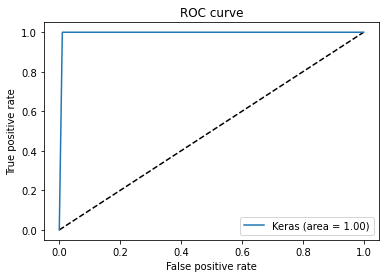

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.2f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()